In [8]:
import os.path
import os as op
from github import Github
from base64 import decodebytes as dcd

TIMESTAMP = '@{:%Y-%m-%d %H:%M}'

# LOCAL_FOLDER = os.path.abspath(os.path.join(os.path.dirname(__file__), '../model/git/spg'))
REMOTE_URL = "https://github.com/SuPyPackage/SuPyGirls.git"
USERNAME = "kwarwp"
# PASSWORD = dcd(str.encode(op.environ["IKW"])).decode("utf-8")
TOKEN = dcd(str.encode(op.environ["IKT"])).decode("utf-8")


class DataSource:
    def __init__(self):
        # g = Github(USERNAME, PASSWORD)
        g = Github(TOKEN)
        g.get_user("kwarwp")
        self.user = g.get_user("kwarwp")
        self.repo = None

    def get_file_branched(self, project, packager, moduler="main.py"):
        self.repo = self.user.get_repo(project)
        self.repo.get_branches()
        ref = self.repo.get_branch(packager).commit.sha
        return self.repo.get_file_contents("{}/{}".format(packager, moduler), ref)

    def get_file_contents(self, project, packager, moduler="main.py"):
        self.repo = self.user.get_repo(project)
        path = "{}/{}" if packager else "{}{}"
        print("get_file_contents ", project, path.format(packager, moduler))
        return self.repo.get_file_contents(path.format(packager, moduler))

ds = DataSource()
code_file = ds.get_file_contents("vera","julia","__score__.py")
code = dcd(str.encode(code_file.content)).decode("utf-8")
code = "[["+"],\n[{".join(code.split(",\n{"))[1:-2]+"]]"
code


get_file_contents  vera julia/__score__.py


"[[{'doc_id': '2dd768da', 'carta': 'Nickolas Vieira', 'casa': 'pescaria', 'move': 'JULIA', 'ponto': 'OK', 'valor': '', '_level': 0, 'tempo': 1565370475820}],\n[{'doc_id': '2dd768da', 'carta': 'Nickolas Vieira', 'casa': 'pescaria', 'move': 'JULIA', 'ponto': 'OK', 'valor': '', '_level': 0, 'tempo': 1565370511667},\n  {'doc_id': '2dd768da', 'carta': 'peixe grande  ', 'casa': [453, 509], 'move': 'OLHA', 'ponto': True, 'valor': 0, '_level': 1, 'tempo': 1565370621506},\n  {'doc_id': '2dd768da', 'carta': ' peixe grande ', 'casa': [573, 548], 'move': 'OLHA', 'ponto': True, 'valor': 0, '_level': 1, 'tempo': 1565370649514},\n  {'doc_id': '2dd768da', 'carta': ' peixe médio', 'casa': [374, 617], 'move': 'OLHA', 'ponto': True, 'valor': 0, '_level': 1, 'tempo': 1565370700279},\n  {'doc_id': '2dd768da', 'carta': 'peixe grande', 'casa': [606, 626], 'move': 'OLHA', 'ponto': True, 'valor': 0, '_level': 1, 'tempo': 1565370736724}],\n[{'doc_id': '092c19ea', 'carta': 'Joao Paulo', 'casa': 'pescaria', 'move

In [9]:
json = code
from json import loads
json = json.replace("'", '"')
json = json.replace("(", '[')
json = json.replace(")", ']')
json = json.replace("True", 'true')
json = json.replace("False", 'false')
print(json)
all_data = loads(json)


[[{"doc_id": "2dd768da", "carta": "Nickolas Vieira", "casa": "pescaria", "move": "JULIA", "ponto": "OK", "valor": "", "_level": 0, "tempo": 1565370475820}],
[{"doc_id": "2dd768da", "carta": "Nickolas Vieira", "casa": "pescaria", "move": "JULIA", "ponto": "OK", "valor": "", "_level": 0, "tempo": 1565370511667},
  {"doc_id": "2dd768da", "carta": "peixe grande  ", "casa": [453, 509], "move": "OLHA", "ponto": true, "valor": 0, "_level": 1, "tempo": 1565370621506},
  {"doc_id": "2dd768da", "carta": " peixe grande ", "casa": [573, 548], "move": "OLHA", "ponto": true, "valor": 0, "_level": 1, "tempo": 1565370649514},
  {"doc_id": "2dd768da", "carta": " peixe médio", "casa": [374, 617], "move": "OLHA", "ponto": true, "valor": 0, "_level": 1, "tempo": 1565370700279},
  {"doc_id": "2dd768da", "carta": "peixe grande", "casa": [606, 626], "move": "OLHA", "ponto": true, "valor": 0, "_level": 1, "tempo": 1565370736724}],
[{"doc_id": "092c19ea", "carta": "Joao Paulo", "casa": "pescaria", "move": "JUL

In [73]:
VL = ('G', 'C', 'f', 'p', 'b', 'e', 'c')
CT = ('  ', 'o ', 'éd', 'di', 'qu','nd', 'an', 'mé', 'ra')
MV = dict(OLHA=1, BALDE=2)
PT = ('OK', False, True)
data = all_data[5][1:]
# print([d["carta"][-7:-5] for d in data])
tm = [(
    (d["tempo"]-data[0]["tempo"])/50,
    MV[d["move"]],
    d["casa"][1]*2/500+d["casa"][0]/1000 if d["casa"][0] != "p" else 4,
    d["carta"][-5:-3], PT.index(d["ponto"])) for d in data if d]
#     CT.index(d["carta"][0:2])/3, PT.index(d["ponto"])) for d in data]
# print(tm)
tm, mv, cs, ct, pt= zip(*tm)
print(tm, mv, cs, ct, pt)
print(sorted(list(CT)))

(0.0, 36.66, 92.24, 714.62, 1178.9, 4054.14, 4381.86, 4425.04, 4491.4) (1, 1, 1, 1, 1, 1, 1, 1, 1) (2.701, 2.701, 2.676, 2.8619999999999997, 2.87, 2.818, 2.8649999999999998, 2.872, 2.848) ('nd', 'nd', 'nd', 'di', 'o ', 'mé', 'di', 'di', 'di') (2, 2, 2, 2, 2, 2, 2, 2, 2)
['  ', 'an', 'di', 'mé', 'nd', 'o ', 'qu', 'ra', 'éd']


In [74]:
def plot(nome, data):
    tm = [(
    (d["tempo"]-data[0]["tempo"])/50,
    MV[d["move"]],
    (d["casa"][1]*2/500+d["casa"][0]/1000) if d["casa"][0] != "h" else 4,
    CT.index(d["carta"][-5:-3])/3, PT.index(d["ponto"])) for d in data]
    tm, mv, cs, ct, pt= zip(*tm)
    acertos = sum(1 for p in pt if p >1)
    erros = sum(1 for p in pt if p ==1)
    dtm = [d1-d0 for d0, d1 in zip(tm, tm[1:])]
    dtm = [(d1-d0)/500 for d0, d1 in zip(dtm, dtm[1:])]
    from matplotlib import pyplot as plt
    x, y = zip(*[(x, y) for x, y in enumerate(dtm)])
    x1, y1 = zip(*[(x, y) for x, y in enumerate(mv)])
    x2, y2 = zip(*[(x, y) for x, y in enumerate(cs)])
    x4, y4 = zip(*[(x, y) for x, y in enumerate(ct)])
    x5, y5 = zip(*[(x, y) for x, y in enumerate(pt)])
    _ = plt.figure(figsize=(20,10))
    _ = plt.plot(x, y, label="aceleração",linewidth=4.0)
    _ = plt.plot(x1, y1, label="operação",linewidth=5.0)
    _ = plt.plot(x2, y2, label="quadrante",linewidth=6.0)
    _ = plt.plot(x4, y4, label="açao",linewidth=6.5)
    _ = plt.plot(x5, y5, label="correção",linewidth=4.5)
    _  = plt.legend(prop={'size': 24})
    _ = plt.xlabel("tempo", fontsize=24)
    _ = plt.ylabel("variação", fontsize=24)
    _ = plt.title(f"Jogo do Parque - {nome} - acertos:{acertos} - erros:{erros}", fontsize=24)
    # _ = plt.savefig('ilha.png')
    plt.show()

In [75]:
def plot_data():
    alld = [(d[0]["carta"], d[1:]) for d in all_data if len(d[1:])> 1]
    for nome, data in alld:        
        yield plot(nome, data)
pl = plot_data()

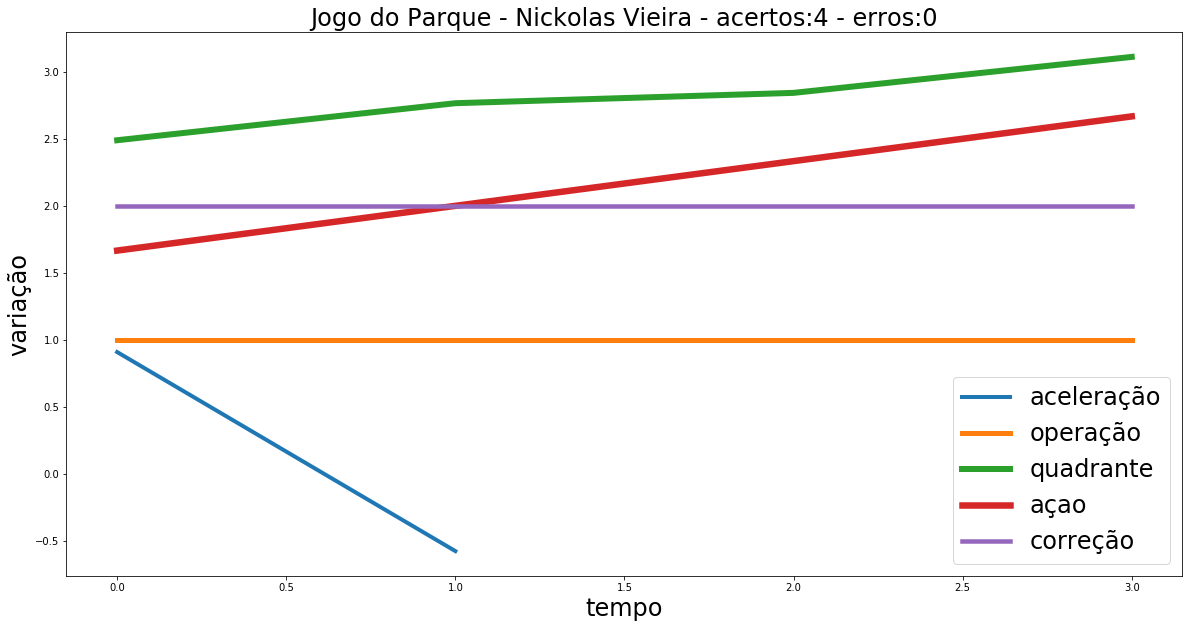

In [76]:
next(pl)

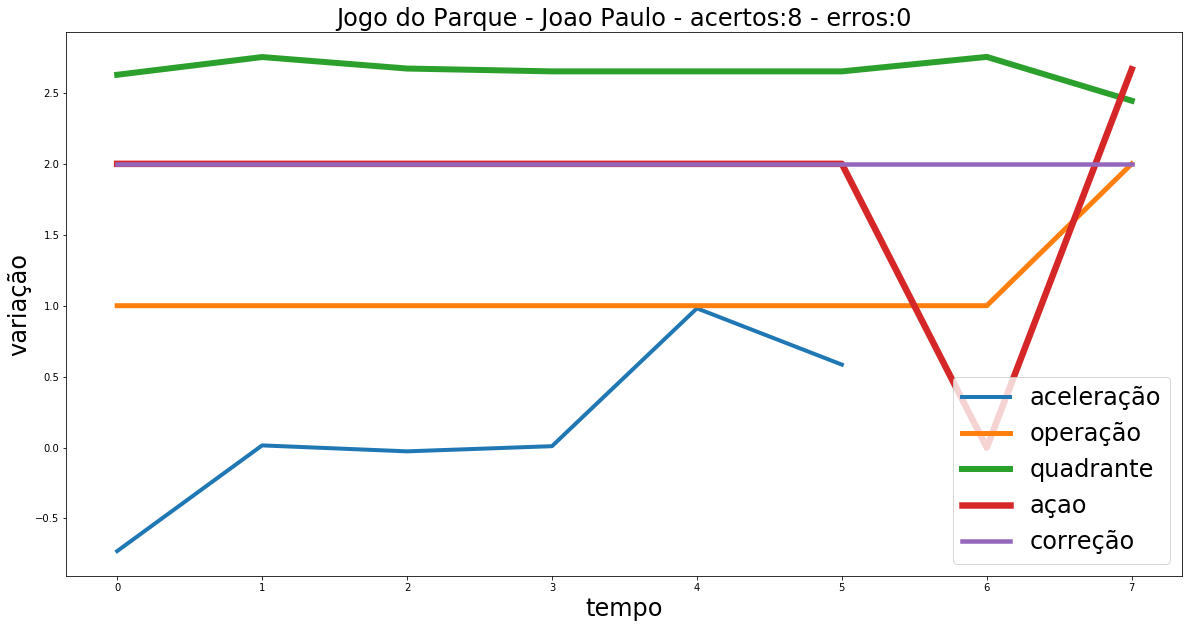

In [77]:
next(pl)

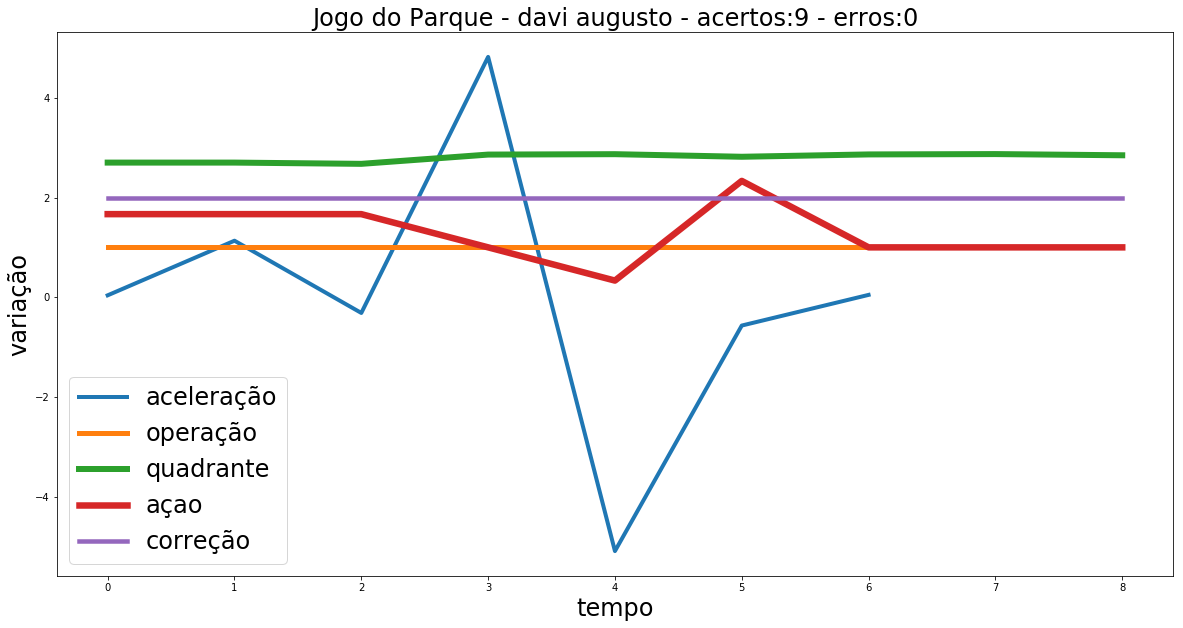

In [78]:
next(pl)

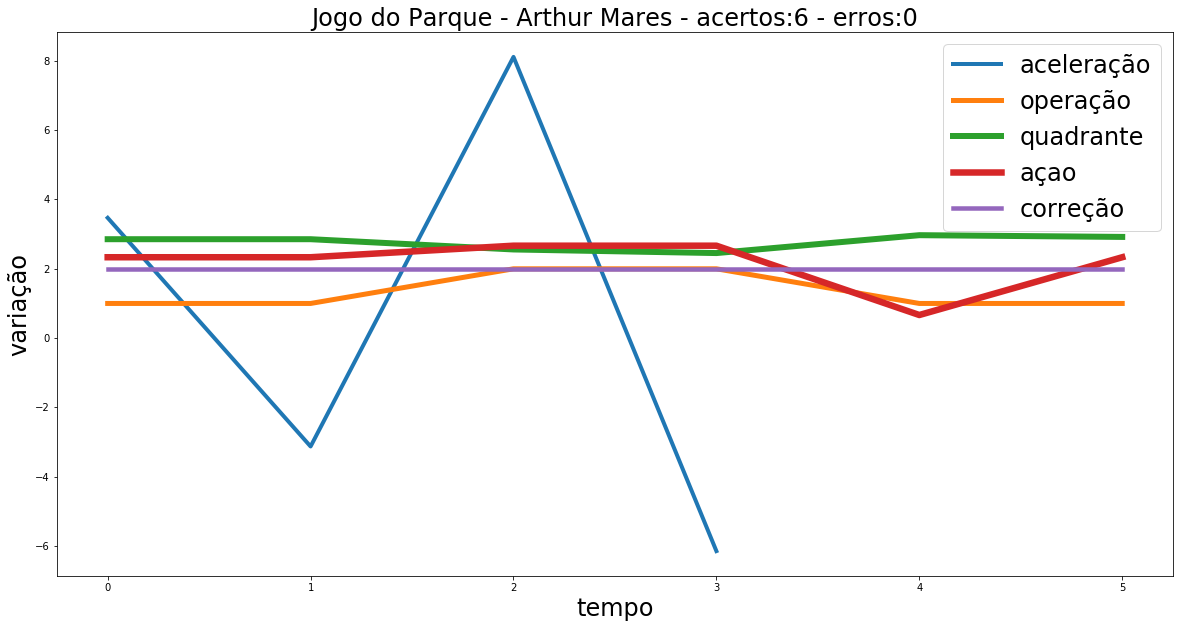

In [79]:
next(pl)

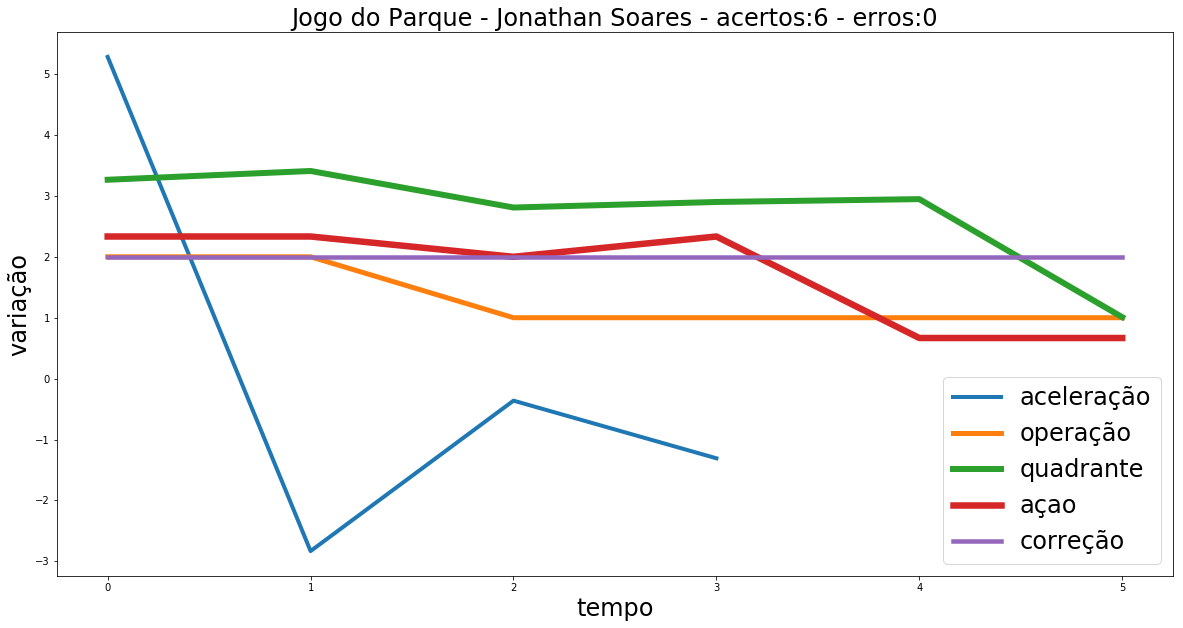

In [80]:
next(pl)

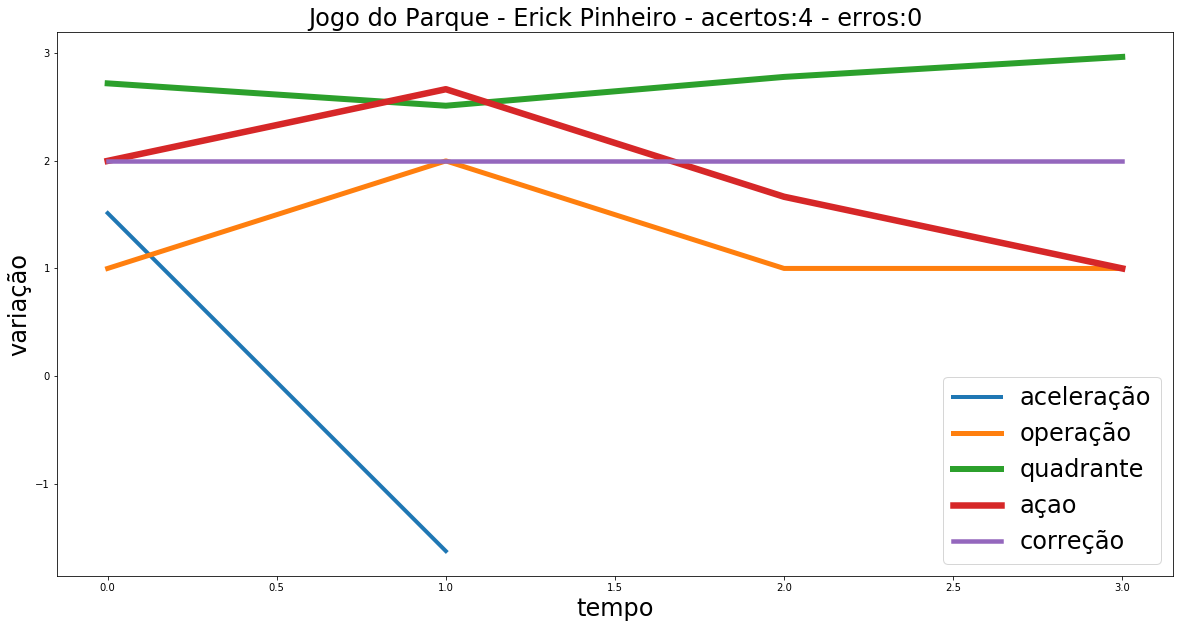

In [81]:
next(pl)

In [83]:
# next(pl)